In [ ]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve

In [ ]:
url = 'https://gist.githubusercontent.com/inthegreenwild/af2b63667424606ff7de3552ae764dee/raw/1df68d4b3d5a8c42ce48d1721143da510eed566b/weather.json'
req = requests.get(url)
weathers = json.loads(req.content)

In [ ]:
time_data = []
summary = []
icon = []
precipIntensity= []
precipProbability= []
temperature = []
apptemp = []
dewpoint = []
humidity = []
presure = []
wind_speed = []
wind_gust = []
wind_bearing = []
cloud_cover =  []
uv_index = []
visibility =[]
ozone = []

In [ ]:
i = 0
while i < 365:
    for weather in (weathers[i]['hourly']['data']):
        time_data.append(weather['time'])
        summary.append(weather['summary'])
        icon.append(weather['icon'])
        precipIntensity.append(weather['precipIntensity'])
        precipProbability.append(weather['precipProbability'])
        temperature.append(weather["temperature"])
        apptemp.append(weather["apparentTemperature"])
        dewpoint.append(weather["dewPoint"])
        humidity.append(weather["humidity"])
        presure.append(weather["pressure"])
        wind_speed.append(weather["windSpeed"])
        wind_gust.append(weather["windGust"])
        wind_bearing.append(weather["windBearing"])
        cloud_cover.append(weather['cloudCover'])
        uv_index.append(weather['uvIndex'])
        visibility.append(weather['visibility'])
        ozone.append(weather['ozone'])
    i += 1

In [ ]:
data = {
    "time": time_data,
    "summary": summary,
    "icon": icon,
    "precipIntensity": precipIntensity,
    "precipProbability": precipProbability,
    "temperature": temperature,
    "apparentTemperature": apptemp,
    "dewPoint": dewpoint,
    "humidity": humidity,
    "pressure": presure,
    "windSpeed": wind_speed,
    "windGust": wind_gust,
    "windBearing": wind_bearing,
    "cloudCover": cloud_cover,
    "uvIndex": uv_index,
    "visibility": visibility,
    "ozone": ozone
}

df = pd.DataFrame(data)

In [ ]:
print("Banyak Data yang dijadikan untuk Machine Learning:", len(ozone))

Banyak Data yang dijadikan untuk Machine Learning: 8760


In [ ]:
null_values = df.isnull().sum()
print(null_values)
unique_values = df['summary'].unique()
print(unique_values)
unique_values = df['icon'].unique()
print(unique_values)
unique_values = df['uvIndex'].unique()
print(unique_values)


time                   0
summary                0
icon                   0
precipIntensity        0
precipProbability      0
temperature            0
apparentTemperature    0
dewPoint               0
humidity               0
pressure               0
windSpeed              0
windGust               0
windBearing            0
cloudCover             0
uvIndex                0
visibility             0
ozone                  0
dtype: int64
['Possible Light Rain' 'Light Rain' 'Mostly Cloudy' 'Overcast' 'Clear'
 'Drizzle' 'Partly Cloudy' 'Rain' 'Possible Drizzle'
 'Possible Light Rain and Windy' 'Dangerously Windy and Overcast'
 'Rain and Windy' 'Snow' 'Foggy' 'Light Snow' 'Flurries'
 'Drizzle and Windy' 'Windy and Overcast' 'Windy and Mostly Cloudy'
 'Humid and Mostly Cloudy' 'Humid and Partly Cloudy' 'Drizzle and Humid'
 'Humid' 'Light Rain and Humid' 'Humid and Overcast'
 'Possible Light Rain and Humid' 'Rain and Humid' 'Heavy Rain and Humid'
 'Heavy Rain' 'Heavy Rain and Dangerously Windy'

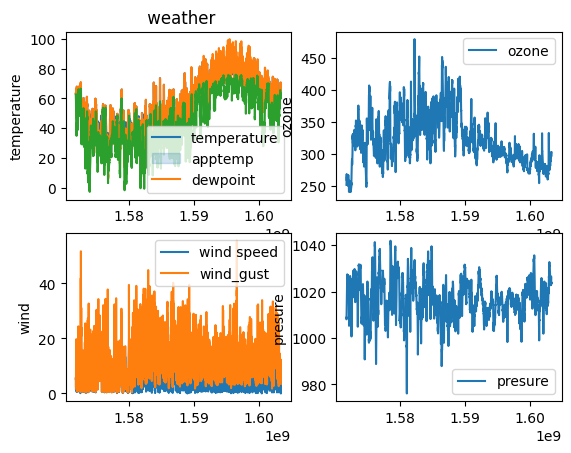

In [ ]:
#MathPlotLib Visualisasi Data
plt.subplot(2,2,1)
sns.lineplot(x = time_data,y = temperature)
sns.lineplot(x = time_data,y = apptemp)
sns.lineplot(x = time_data,y = dewpoint)
plt.legend(['temperature','apptemp', 'dewpoint' ])
plt.title(f' weather')
plt.ylabel('temperature')

plt.subplot(2,2,2)
plt.plot(time_data,ozone)
plt.legend(['ozone', 'wind_bearing' ])
plt.ylabel('ozone')

plt.subplot(2,2,3)
plt.plot(time_data,wind_speed)
plt.plot(time_data,wind_gust)
plt.legend(['wind speed', 'wind_gust' ])
plt.ylabel('wind')


plt.subplot(2,2,4)
plt.plot(time_data,presure)
plt.legend(['presure' ])
plt.ylabel('presure')
plt.show()

In [ ]:
X = df.drop(["summary", "time", "icon"], axis=1)
y = df["summary"]  # Target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=54)
print(X_train)

      precipIntensity  precipProbability  temperature  apparentTemperature  \
46             0.0000               0.00        57.33                57.33   
4057           0.0000               0.00        48.27                45.63   
1233           0.0000               0.00        36.82                33.26   
4116           0.0000               0.00        49.33                46.82   
7404           0.0000               0.00        75.60                75.60   
...               ...                ...          ...                  ...   
7480           0.0005               0.05        80.02                84.28   
5143           0.0000               0.00        53.70                53.70   
898            0.0000               0.00        33.65                27.19   
7493           0.0000               0.00        69.47                69.47   
7279           0.0000               0.00        68.43                68.95   

      dewPoint  humidity  pressure  windSpeed  windGust  windBe

In [ ]:
rf = RandomForestClassifier(n_estimators=8, random_state=39)
rf.fit(X_train, y_train) #kode untuk train
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("test Accuracy:", accuracy)

y_train_pred = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("train Accuracy", train_accuracy)

test Accuracy: 0.9790715372907154
train Accuracy 0.9996738421395955


In [ ]:

confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)


[[1244    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    1
     0    0    0    0    0    0    0    0]
 [   2    0   33    0    0    0    0    0    0    1    0    0    1    1
     1    0    0    0    0    0    0    0]
 [   2    0    1    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    2    0    0    0    0    0    0    0    0    1
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0   38    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    1   18    0    1    0    0    0    2    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    9    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    2    3    0    6    0    0    0    0    0
     0  

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


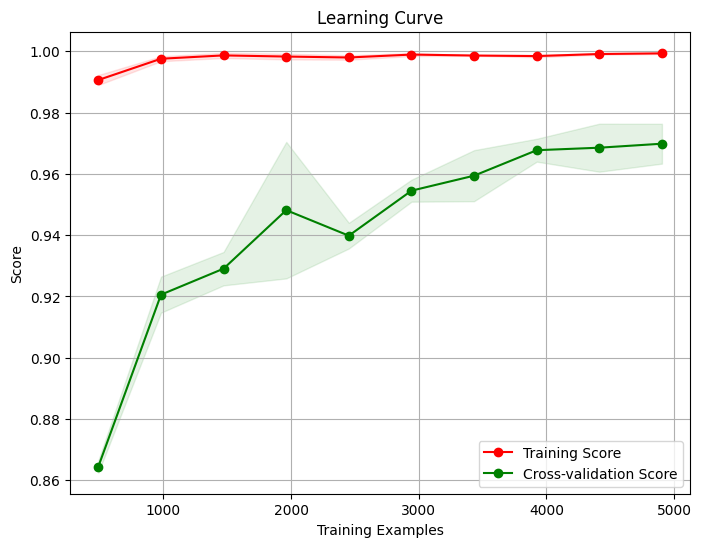

In [ ]:
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

    # Menghitung rata-rata dan standar deviasi dari skor train dan test
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Membuat plot learning curve
    plt.figure(figsize=(8, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()

    # Menampilkan kurva train accuracy
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")

    # Menampilkan kurva test accuracy
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.legend(loc="best")
    plt.show()

# Menggunakan fungsi plot_learning_curve untuk memvisualisasikan learning curve
plot_learning_curve(rf, X_train, y_train)

In [ ]:
df

,time,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,ozone
0,1571803200,Possible Light Rain,rain,0.0127,0.30,62.88,63.52,62.62,0.99,1008.7,5.24,5.24,149,1.00,0,7.157,252.1
1,1571806800,Possible Light Rain,rain,0.0177,0.29,63.53,64.12,62.49,0.96,1008.1,5.81,5.81,236,0.99,0,8.682,252.4
2,1571810400,Light Rain,rain,0.0115,0.98,61.81,62.19,60.59,0.96,1008.1,5.10,5.10,298,1.00,0,4.647,252.8
3,1571814000,Mostly Cloudy,partly-cloudy-night,0.0000,0.00,60.41,60.41,57.43,0.90,1008.0,4.59,4.59,12,0.80,0,7.533,254.4
4,1571817600,Overcast,cloudy,0.0000,0.00,60.20,60.20,57.16,0.90,1008.2,1.26,2.34,325,0.93,0,10.000,256.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1603321200,Overcast,cloudy,0.0000,0.00,65.59,66.13,62.95,0.91,1023.7,4.20,9.90,148,0.93,0,10.000,302.0
8756,1603324800,Mostly Cloudy,partly-cloudy-night,0.0000,0.00,64.36,64.94,62.74,0.94,1023.7,4.94,7.71,152,0.87,0,9.086,301.9
8757,1603328400,Mostly Cloudy,partly-cloudy-night,0.0000,0.00,64.14,64.72,62.70,0.95,1023.9,3.84,6.39,33,0.70,0,7.012,302.5
8758,1603332000,Overcast,cloudy,0.0000,0.00,63.96,64.52,62.52,0.95,1024.0,0.00,3.99,292,0.93,0,5.601,302.4


In [ ]:
10# tempat melakukan prediksi dari User

time_data = int(input('masukan data'))
precipIntensity= float(input('masukan data'))
precipProbability= float(input('masukan data'))
temperature = float(input('masukan data'))
apptemp = float(input('masukan data'))
dewpoint = float(input('masukan data'))
humidity = float(input('masukan data'))
presure = float(input('masukan data'))
wind_speed = float(input('masukan data'))
wind_gust = float(input('masukan data'))
wind_bearing = int(input('masukan data'))
cloud_cover =  float(input('masukan data'))
uv_index = float(input('masukan data'))
visibility =float(input('masukan data'))
ozone = float(input('masukan data'))

datainput = {
    "time": time_data,
    "precipIntensity": precipIntensity,
    "precipProbability": precipProbability,
    "temperature": temperature,
    "apparentTemperature": apptemp,
    "dewPoint": dewpoint,
    "humidity": humidity,
    "pressure": presure,
    "windSpeed": wind_speed,
    "windGust": wind_gust,
    "windBearing": wind_bearing,
    "cloudCover": cloud_cover,
    "uvIndex": uv_index,
    "visibility": visibility,
    "ozone": ozone
}



masukan data1290112
masukan data23.0
masukan data12
masukan data12
masukan data12
masukan data12
masukan data12
masukan data1
masukan data1
masukan data1
masukan data1
masukan data1
masukan data1
masukan data1
masukan data1


In [ ]:
df_user =pd.DataFrame(datainput, index=[0])
df_user

,time,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,ozone
0,1290112,23.0,12.0,12.0,12.0,12.0,12.0,1.0,1.0,1.0,1,1.0,1.0,1.0,1.0


In [ ]:
x_user = df_user.drop(["time"], axis=1)
time_user = df_user['time']
x_user

,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,ozone
0,23.0,12.0,12.0,12.0,12.0,12.0,1.0,1.0,1.0,1,1.0,1.0,1.0,1.0


In [ ]:
time_user


0    1290112
Name: time, dtype: int64

In [ ]:
user_pred = rf.predict(x_user)
user_pred

array(['Rain'], dtype=object)

In [ ]:
print(user_pred[0])

Rain
